# Python Data Analysis

The **target** value or **label** is the value that we would like to predict using the other variables.

In [159]:
import pandas as pd
import numpy as np
df = pd.read_csv("assets/sales.csv")
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/10,669165933,6/27/10,9925,255.28,159.42,2533654.00,1582243.50,?
1,Central America and the Caribbean,Grenada,Cereal,?,C,8/22/12,963881480,9/15/12,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,?,L,5/2/14,341417157,5/8/14,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/14,514321792,7/5/14,8102,9.33,6.92,75591.66,56065.84,?
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/13,115456712,2/6/13,5062,651.21,524.96,3296425.02,2657347.52,639077.5


## Pre-Processing

After the data has been loaded, we then apply an assortment of techniques to prepare the raw data for analysis. This includes: dealing with missing values, data formatting and normalization/scaling.

#### Dealing With Missing Values

Missing values are common. The first step is to identify missing values (using ```df.isnull()``` or ```df.notnull()```) and replace them with the standard ```NaN```. Next, we decide how to deal with the holes in the dataset. One initial option is to check with the collection source to see whether the missing data can be obtained or estimated. If not, then there are several additional options:

* Replace the missing value:
    * With the average (of similar data points)
    * With the mode, if it is a categorical variable
    * Using another estimation technique
* Or, you may choose to remove the missing data:
    * Either by dropping the data entry (row): ```axis = 0```
    * Or by dropping the entire variable (column): ```axis = 1```
* Lastly, you may choose to leave the missing data as is

In [160]:
df.replace("?", np.nan, inplace = True) # Replace ? with standard NaN

In [161]:
missing_data = df.isnull()
missing_data.head() # Returns matrix of True/False values, indicating where data is missing

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [162]:
# Display total number of True/False values in each column
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")

Region
False    100
Name: Region, dtype: int64

Country
False    100
Name: Country, dtype: int64

Item Type
False    100
Name: Item Type, dtype: int64

Sales Channel
False    97
True      3
Name: Sales Channel, dtype: int64

Order Priority
False    100
Name: Order Priority, dtype: int64

Order Date
False    100
Name: Order Date, dtype: int64

Order ID
False    100
Name: Order ID, dtype: int64

Ship Date
False    100
Name: Ship Date, dtype: int64

Units Sold
False    100
Name: Units Sold, dtype: int64

Unit Price
False    100
Name: Unit Price, dtype: int64

Unit Cost
False    100
Name: Unit Cost, dtype: int64

Total Revenue
False    100
Name: Total Revenue, dtype: int64

Total Cost
False    100
Name: Total Cost, dtype: int64

Total Profit
False    97
True      3
Name: Total Profit, dtype: int64



In [163]:
df.dropna(subset = ["Sales Channel"], axis = 0) # Returns a new modified dataframe; good for testing
df.dropna(subset = ["Sales Channel"], axis = 0, inplace = True) # Modifies dataframe in-place
df.reset_index(drop = True, inplace = True) # Reset index, since we dropped rows

In [164]:
avg = df["Units Sold"].mean()
df["Units Sold"] = df["Units Sold"].replace(np.nan, avg) # Replace NaN with mean value

In [165]:
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/10,669165933,6/27/10,9925,255.28,159.42,2533654.00,1582243.50,NaN
1,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/14,514321792,7/5/14,8102,9.33,6.92,75591.66,56065.84,NaN
2,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/13,115456712,2/6/13,5062,651.21,524.96,3296425.02,2657347.52,639077.5
3,Sub-Saharan Africa,Angola,Household,Offline,M,4/23/11,135425221,4/27/11,4187,668.27,502.54,2798046.49,2104134.98,NaN
4,Sub-Saharan Africa,Burkina Faso,Vegetables,Online,H,7/17/12,871543967,7/27/12,8082,154.06,90.93,1245112.92,734896.26,510216.66


#### Formatting

Formatting is the process by which data is transformed to provide a common standard of expression. This facilitates aggregation and comparison. Often this involves performing calculations on an entire column of data to convert it into the desired units or using ```astype()``` to convert data into the correct type.

In [166]:
df["Unit Cost"] = df["Unit Cost"] * 0.89 # Convert USD to Euro
df.rename(columns={"Unit Cost":"Unit Cost (EUR)"}, inplace=True)

In [167]:
df["Unit Price"] = df["Unit Price"].astype("int") # Cast column to integer type

In [168]:
df.dtypes

Region              object
Country             object
Item Type           object
Sales Channel       object
Order Priority      object
Order Date          object
Order ID             int64
Ship Date           object
Units Sold           int64
Unit Price           int64
Unit Cost (EUR)    float64
Total Revenue      float64
Total Cost         float64
Total Profit        object
dtype: object

#### Normalization

Normalization is the process of scaling values to a range that is consistent with the rest of the data. This enables fair comparison between variables and gives them equal influence on the model and our results. 

There are three main techniques for normalizing data:

* Simple Feature Scaling (range: 0 to 1)

$ 
\begin{align} x_{new} = \frac{x_{old}}{x_{max}} \end{align}
$

* Min-Max (range: 0 to 1)

$ 
\begin{align} x_{new} = \frac{x_{old} - x_{min}}{x_{max} - x_{min}} \end{align}
$

* Z-score aka Standard Score (typical range: -3 to 3)

$ 
\begin{align} x_{new} = \frac{x_{old} - \mu}{\sigma} \end{align}
$

In [169]:
a = {"age": [20, 30, 40], "income": [100000, 20000, 50000]} # Not normalized
df = pd.DataFrame(a)
df

,age,income
0,20,100000
1,30,20000
2,40,50000


In [170]:
# Simple Feature Scaling
df["age_sfs"] = df["age"] / df["age"].max()
df["income_sfs"] = df["income"] / df["income"].max()
df

,age,income,age_sfs,income_sfs
0,20,100000,0.50,1.0
1,30,20000,0.75,0.2
2,40,50000,1.00,0.5


In [171]:
# Min-Max
df["age_mm"] = (df["age"] - df["age"].min()) / (df["age"].max() - df["age"].min())
df["income_mm"] = (df["income"] - df["income"].min()) / (df["income"].max() - df["income"].min())
df

,age,income,age_sfs,income_sfs,age_mm,income_mm
0,20,100000,0.50,1.0,0.0,1.000
1,30,20000,0.75,0.2,0.5,0.000
2,40,50000,1.00,0.5,1.0,0.375


In [172]:
# Z-Score
df["age_z"] = (df["age"] - df["age"].mean()) / df["age"].std()
df["income_z"] = (df["income"] - df["income"].mean()) / df["income"].std()
df

,age,income,age_sfs,income_sfs,age_mm,income_mm,age_z,income_z
0,20,100000,0.50,1.0,0.0,1.000,-1.0,1.072222
1,30,20000,0.75,0.2,0.5,0.000,0.0,-0.907265
2,40,50000,1.00,0.5,1.0,0.375,1.0,-0.164957


#### Binning

Binning involves grouping values, often transforming them from numerical into categorical variables.

In [173]:
price = {"price":[10000, 50000, 12000, 66000, 99000, 4000, 24000, 78000, 2900, 44000]}
df = pd.DataFrame(price)
df

,price
0,10000
1,50000
2,12000
3,66000
4,99000
5,4000
6,24000
7,78000
8,2900
9,44000


In [174]:
bins = np.linspace(df["price"].min(),df["price"].max(),4)
bin_names = ["Low", "Moderate", "High"]
df["binned"] = pd.cut(df["price"], bins, labels=bin_names, include_lowest=True)
df

,price,binned
0,10000,Low
1,50000,Moderate
2,12000,Low
3,66000,Moderate
4,99000,High
5,4000,Low
6,24000,Low
7,78000,High
8,2900,Low
9,44000,Moderate


In [175]:
print("Most common bin:", df["binned"].value_counts().idxmax())
df["binned"].value_counts()

Most common bin: Low


Low         5
Moderate    3
High        2
Name: binned, dtype: int64

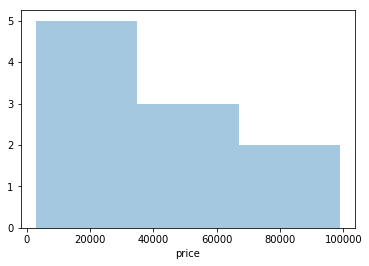

In [177]:
import seaborn as sns

g = sns.distplot(df["price"], kde=False)

#### Converting Categorical Variables

Most statistical models cannot take categorical variables (objects/strings) as input. Instead, we convert these variables into numbers, assigning either 0 or 1 using a technique called "one-hot encoding".

In [144]:
cars = {"car": ['A','B','C','D'], "fuel":["gas","diesel","gas","diesel"]}
df = pd.DataFrame(cars)
df

,car,fuel
0,A,gas
1,B,diesel
2,C,gas
3,D,diesel


In [145]:
dummies = pd.get_dummies(df["fuel"]).rename(columns=lambda x: "fuel_" + str(x))
df = pd.concat([df, dummies], axis=1)
df

,car,fuel,fuel_diesel,fuel_gas
0,A,gas,0,1
1,B,diesel,1,0
2,C,gas,0,1
3,D,diesel,1,0


In [146]:
df.drop(["fuel"],axis=1,inplace=True)
df

,car,fuel_diesel,fuel_gas
0,A,0,1
1,B,1,0
2,C,0,1
3,D,1,0
